# Исследование объявлений о продаже квартир

Исследуются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача изучить параметры, определяюшие рыночную стоимость объектов недвижимости. 

Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Изучение данных из файла

In [2]:
data = pd.read_csv(path+'real_estate_data.csv', sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


При рассмотрении описания датасета отмечены следующие проблемы в данных : минимальное значение в числе комнат 0, высота потолков 1 м, а максимальная 100 м, жилая площадь минимальное значение 2 м2, минимальное расстояние до аэропорта 0 м, расстояние до ближайщего парка 1 м. Необходимо рассмотреть подробнее распределение этих данных и, если доля этих "вбросов" невелика, убрать их.

### Вывод

1. В данных есть пропуски в следующих столбцах(14): 
* 'ceiling_height'
* 'floors_total'
* 'living_area'
* is_apartment'
* 'kitchen_area'
* 'balcony'
* 'locality_name'
* 'airports_nearest'
* 'parks_around3000'
* 'parks_nearest'
* 'ponds_around3000'
* 'ponds_nearest'
* 'days_exposition'
* 'city_centers_nearest'
2. Несоответствие типа данных значению столбца
* last_price -float64
* is_apartment - object
* balcony - float64
* days_exposition - float64
* first_day_exposition - object
* floors_total - float64
3. Также в некоторых столбцах встречаются логически невозможные значения. 

Рассмотрим их подробнее и обработаем при необходимости на этапе предобработки данных.

## Предобработка данных

Этапы:
1. Приведение названий столбца к единому формату
2. Выявление явных дубликатов
3. Замена типа данных
4. Заполнение пропусков

**1. Приведение названий столбцов к единому формату**

Приведем название столбца с удаленностью от центра к змеиному регистру.

In [5]:
data = data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'})

**2. Выявление явных дубликатов**

Проверим данные на предмет дубликатов.

In [6]:
data.duplicated().sum()

0

**3. Замена типа данных**

В столбце last_price в вещественных значениям после запятой нули, изменим на целочисленные значения.

In [7]:
data['last_price'] = data['last_price'].astype('int')
# проверим
data['last_price'].head()

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int32

**4. Заполнение пропусков**

Рассмотрим подробнее столбцы с пропусками.

In [8]:
def pass_values(df, column):
    count = df[column].isna().sum()
    percent = round(df[column].isna().sum() * 100 / len(df), 2)
    
    pass_value_df = pd.DataFrame({'column_name': column,
                                  'num_missing': count,
                                  'percent_missing': percent})
    
    return pass_value_df

In [9]:
pass_values(data, column = ['ceiling_height','floors_total','living_area','is_apartment','kitchen_area','balcony','locality_name','airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','days_exposition','city_centers_nearest'])


,column_name,num_missing,percent_missing
ceiling_height,ceiling_height,9195,38.80
floors_total,floors_total,86,0.36
living_area,living_area,1903,8.03
is_apartment,is_apartment,20924,88.29
kitchen_area,kitchen_area,2278,9.61
balcony,balcony,11519,48.61
locality_name,locality_name,49,0.21
airports_nearest,airports_nearest,5542,23.38
parks_around3000,parks_around3000,5518,23.28
parks_nearest,parks_nearest,15620,65.91


Для данных про аэропорты, парки и пруды, апартаменты нет значений на замену, но пропуски в этих столбцах представляют собой значительную долю данных, оставим без изменений. 

**is_apartment**

Наибольшее количество пропусков в графе апартаменты. Вероятно люди, заполнявшие форму не знали, что это значит, поэтому пропустили строку. Когда у человека во владении апартаменты, он об этом знает, соответственно все пропуски можно заменить на False.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Количество пропусков:', data['is_apartment'].isna().sum())
data['is_apartment'].head()

Количество пропусков: 0


0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

**balcony**

В столбце балконы много пропусков, вероятно в квартирах нет балконов, можно заменить пропуски на 0.

In [11]:
data['balcony'] = data['balcony'].fillna(0)
print('Количество пропусков:', data['balcony'].isna().sum())

Количество пропусков: 0


Количество балконов целое число, изменим тип данных.

In [12]:
data['balcony'] = data['balcony'].astype('int')
# проверим
data['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int32

**floors_total**

Количество пропусков floors_total в небольшой доле датасета, ими можно пренебречь.

In [13]:
data = data.dropna(subset = ['floors_total'])
print('Количество пропусков:', data['floors_total'].isna().sum())

Количество пропусков: 0


Количество этажей целое число, изменим тип данных.

In [14]:
data['floors_total'] = data['floors_total'].astype('int')
# проверим
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int32

**ceiling_height**

Ceiling_height количественные переменные, можно использовать медиану для запонения пропусков.  

In [15]:
data['ceiling_height'].median()

2.65

Посмотрим на распределение значений по высоте потолков до заполнения пропусков.

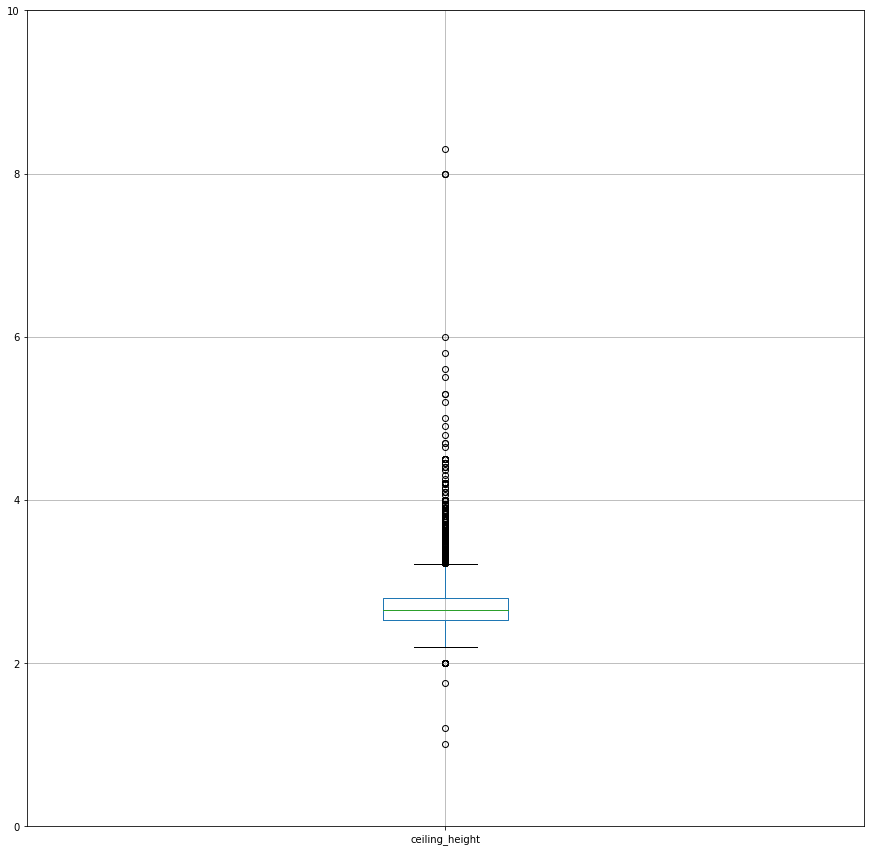

In [16]:
databox = data.boxplot('ceiling_height', figsize = (15,15))
plt.ylim(0,10), databox
plt.show()

Несмотря на длинный "хвост" в сторону больших значений медиана не смещена,значит выбросов не так много, медиана может быть использована для заполнения пропусков.

In [17]:
data.loc[data['ceiling_height'].isna() == True, 'ceiling_height'] = data['ceiling_height'].median()
print('Количество пропусков:', data['ceiling_height'].isna().sum())

Количество пропусков: 0


**living_area**

living_area также количественная переменная, поэтому можно использовать медиану, рассчитанную в зависимости от total_area. 

In [18]:
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Используем перцентили для разделения на категории по total_area.

In [19]:
def categorize_area(area):
    if area < 40.000000:
        return '< 40'
    if (area >40.000000) and (area < 52.000000):
        return '40-52'
    if (area >52.000000) and (area < 69.800000):
        return '52-69.8'
    if area > 69.800000:
        return '>69.8'
data['area_category'] = data.loc[:,'total_area'].apply(categorize_area)
data[['total_area', 'area_category']].head()

,total_area,area_category
0,108.0,>69.8
1,40.4,40-52
2,56.0,52-69.8
3,159.0,>69.8
4,100.0,>69.8


Заполнять характерными значениями можно только пропуски случайного характера. Учитывая проведение подсчета медианы в зависимости от других переменных, проверим является ли пропуски случайными по отношению к total_area.

In [20]:
# выделим строки с пропусками в living_area
living_area_pass = data[data['living_area'].isna()== True]
#  распределение значений для столбца total_area
print(living_area_pass['area_category'].value_counts(normalize = True))
print()
# выделим строки без пропусков living_area
living_area_full = data[data['living_area'].isna()== False]
# распределение значений для столбца  total_area
print(living_area_full['area_category'].value_counts(normalize = True))

>69.8      0.272677
52-69.8    0.252336
40-52      0.246839
< 40       0.228147
Name: area_category, dtype: float64

>69.8      0.254246
52-69.8    0.250765
< 40       0.248553
40-52      0.246436
Name: area_category, dtype: float64


С точностью до десятых распределение в столбце в срезах совпадает, таким образом пропуски от этого столбца не зависят.

In [21]:
# создадим датафрейм с группировкой area_category и вычислим медиану в столбцах living_area
medians = (data.groupby(['area_category']).agg({'living_area':'median'}).rename(columns = {'living_area':'median_living_area'}))
# объединяем два датафрейма получаем новый столбец median_living_area
data = data.merge(medians, on = ['area_category'])
data[['area_category','living_area','median_living_area']].head()

,area_category,living_area,median_living_area
0,>69.8,51.0,51.35
1,>69.8,NaN,51.35
2,>69.8,32.0,51.35
3,>69.8,NaN,51.35
4,>69.8,55.6,51.35


In [22]:
# заменим значения living_area, где они отсутсвуют на median_living_area
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'median_living_area']

# проверим
print('Пропуски после:', data['living_area'].isna().sum())

Пропуски после: 0


**kitchen_area**

kitchen_area также количественные переменные поэтому можно использовать медиану, рассчитанную в зависимости от total_area. Но в квартирах студиях кухня площадь кухни по сути 0.

In [23]:
# выделим строки с пропусками в kitchen_area
kitchen_area_pass = data[data['kitchen_area'].isna()== True]
#  распределение значений для столбца studio 
kitchen_area_pass['studio'].value_counts(normalize = True)


False    0.932935
True     0.067065
Name: studio, dtype: float64

In [24]:
data.loc[(data['kitchen_area'].isna())& (data['studio'] == True),'kitchen_area'] = 0

In [25]:
kitchen_area_pass_after = data[data['kitchen_area'].isna()== True]
kitchen_area_pass_after['studio'].value_counts(normalize = True)

False    1.0
Name: studio, dtype: float64

In [26]:
print('Пропуски до:',data['kitchen_area'].isna().sum())

# заменим значения kitchen_area, где они отсутсвуют на медиану kitchen_area в соответствии с area_category
data['kitchen_area'] = data.groupby('area_category')['kitchen_area'].transform(lambda x : x .fillna(x.median()))

# проверим
print('Пропуски после:', data['kitchen_area'].isna().sum())

Пропуски до: 2031
Пропуски после: 0


**days_exposition**

days_exposition можно рассчитать в зависимости от даты публикации. 

Сначала переведем данные столбца first_day_exposition из object в datetime

In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2015-07-24
2   2018-06-19
3   2019-04-18
4   2017-11-23
Name: first_day_exposition, dtype: datetime64[ns]

Посмотрим как зависит число пропусков от даты публикации.

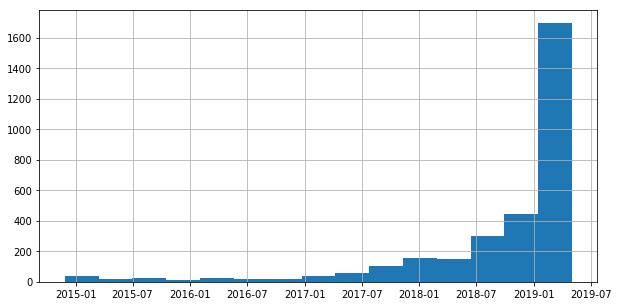

In [28]:
data.loc[data['days_exposition'].isna()]['first_day_exposition'].hist(bins = 15, figsize = (10,5))
plt.show()

Основное число пропусков приходится на месяцы, ближайшие к дате выгрузки данных. Видимо эти объявления к моменту выгрузки являлись незаконченными.

Доля строк с пропусками дней экспозиции 13%, чтобы не потерять эти данные, оставим в этих строках пропуски.

**city_centers_nearest**

Расстояние до центра довольно много значений пропущено, можно заменить на медиану, рассчитанную в зависимости от locality_name. Но в самом locality_name есть пропуски, для начала нужно поработать с ними, также можно присваивать значение в зависимости от расстояния до центра, если это возможно, а если нет, можно убрать эти строки - их доля невелика.

In [29]:
data = data.dropna(subset = ['locality_name'])
print('Количество пропусков:', data['locality_name'].isna().sum())

Количество пропусков: 0


Проверим значения locality_name на неявные дубликаты.

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Парголово', 'Колпино', 'Петергоф',
       'Сертолово', 'деревня Фёдоровское', 'деревня Новое Девяткино',
       'посёлок Шушары', 'поселок городского типа Кузьмоловский',
       'Выборг', 'Павловск', 'деревня Пикколово', 'Приозерск', 'Пушкин',
       'деревня Куттузи', 'деревня Заклинье', 'поселок Торковичи',
       'посёлок городского типа Сиверский', 'Ломоносов', 'Красное Село',
       'Мурино', 'Сосновый Бор', 'Сестрорецк', 'деревня Кальтино',
       'поселок Бугры', 'Зеленогорск', 'Волхов', 'Ивангород', 'Луга',
       'посёлок городского типа Лебяжье', 'Волосово', 'Кингисепп',
       'городской посёлок Янино-1', 'Тосно', 'посёлок Александровская',
       'Всеволожск', 'Кудрово', 'Кронштадт', 'деревня Старая',
       'посёлок Металлострой', 'посёлок Тельмана', 'деревня Кудрово',
       'посёлок Мурино', 'поселок Рябово',
       'посёлок городского типа имени Морозова', 'Сланцы',
       'посёлок городского типа Тайцы', 'Отрадное', 'Гатчина',
       

Встречаются разные написания "поселок" и "посёлок" и другие. Оставим только названия населенных пунктов.

In [31]:
words = ['поселок','посёлок','деревня','городского типа','село','городской',' при железнодорожной станции','садоводческое некоммерческое товарищество','садовое товарищество','коттеджный'] 
for word in words: 
    data['locality_name'] = data['locality_name'].str.replace(word,'')

data['locality_name'].unique()

array(['Санкт-Петербург', ' Парголово', 'Колпино', 'Петергоф',
       'Сертолово', ' Фёдоровское', ' Новое Девяткино', ' Шушары',
       '  Кузьмоловский', 'Выборг', 'Павловск', ' Пикколово', 'Приозерск',
       'Пушкин', ' Куттузи', ' Заклинье', ' Торковичи', '  Сиверский',
       'Ломоносов', 'Красное Село', 'Мурино', 'Сосновый Бор',
       'Сестрорецк', ' Кальтино', ' Бугры', 'Зеленогорск', 'Волхов',
       'Ивангород', 'Луга', '  Лебяжье', 'Волосово', 'Кингисепп',
       '  Янино-1', 'Тосно', ' Александровская', 'Всеволожск', 'Кудрово',
       'Кронштадт', ' Старая', ' Металлострой', ' Тельмана', ' Кудрово',
       ' Мурино', ' Рябово', '  имени Морозова', 'Сланцы', '  Тайцы',
       'Отрадное', 'Гатчина', ' Стрельна', ' Ропша', 'Пикалёво',
       '  Никольский', '  имени Свердлова', '  Токсово', ' Репино',
       ' Старая Малукса', ' Победа', 'Кировск', 'Сясьстрой',
       ' Запорожское', ' Новый Свет', '  Рощино', 'Тихвин', 'Любань',
       ' Кривко', ' Агалатово', 'Шлиссельбург'

In [32]:
# рассчитаем медиану city_centers_nearest в зависимости от locality_name
medians_city_сenter = (data.groupby(['locality_name']).agg({'city_centers_nearest':'median'}).rename(columns = {'city_centers_nearest':'median_city_center'}))
# объединяем два датафрейма получаем новый столбец median_living_area
data = data.merge(medians_city_сenter, on = ['locality_name'])
data[['locality_name','city_centers_nearest','median_city_center']].tail(20)

,locality_name,city_centers_nearest,median_city_center
23006,Белоостров,38868.0,38868.0
23007,Вещево,NaN,NaN
23008,Форт Красная Горка,NaN,NaN
23009,Старая Пустошь,NaN,NaN
23010,Старая Пустошь,NaN,NaN
23011,Рябово,NaN,NaN
23012,Курковицы,NaN,NaN
23013,Суоранда,NaN,NaN
23014,Суоранда,NaN,NaN
23015,Кондратьево,NaN,NaN


In [33]:
# заменим значения city_centers_nearest, где они отсутсвуют на median_living_area
data.loc[data['city_centers_nearest'].isna(),'city_centers_nearest'] = data.loc[data['city_centers_nearest'].isna(), 'median_city_center']

# проверим
print('Пропуски после:', data['city_centers_nearest'].isna().sum())

Пропуски после: 5297


Недостаточно данных для рассчета медианы для некоторых населенных пунктов, поэтому в этих строках оставим пропуски.

### Вывод

1. Заполнены пропущенных значений в столбцах, где это было возможно:
* 'ceiling_height'
* 'living_area'
* is_apartment'
* 'kitchen_area'
* 'balcony'
2. Удалены пропуски:
* 'floors_total' составляющие 0,36% данных.

3. Оставлены пропуски по причине недостатка информации для замены с целью сохранения большей части данных. В столбцах:
* 'locality_name'
* 'airports_nearest'
* 'parks_around3000'
* 'parks_nearest'
* 'ponds_around3000'
* 'ponds_nearest'
* 'days_exposition'
* 'city_centers_nearest'


## Расчёты и добавление результатов в таблицу

**Цена квадратного метра**

In [34]:
data['metr_price'] = (data['last_price']/data['total_area']).astype('int')
data[['last_price','total_area','metr_price']].head()

,last_price,total_area,metr_price
0,13000000,108.0,120370
1,64900000,159.0,408176
2,10000000,100.0,100000
3,7915000,71.6,110544
4,6700000,82.0,81707


**День недели, месяц и год**

In [35]:
# столбец с днем недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
# месяц
data['month_exposition'] = data['first_day_exposition'].dt.month
# год
data['year_exposition'] = data['first_day_exposition'].dt.year
data[['first_day_exposition','weekday_exposition','month_exposition','year_exposition']].head()

,first_day_exposition,weekday_exposition,month_exposition,year_exposition
0,2019-03-07,3,3,2019
1,2015-07-24,4,7,2015
2,2018-06-19,1,6,2018
3,2019-04-18,3,4,2019
4,2017-11-23,3,11,2017


**Категоризация по этажам**

In [36]:
# создадим функцию для определения категории по этажу
def categorize_floor(row):
        if row ['floor'] == 1:
            return 'первый'
        if row ['floor'] == row ['floors_total']:
            return 'последний'
        else:
            return 'другой'
#добавим новый столбец с категорией по этажу
data['floor_category'] =  data.apply(categorize_floor, axis=1)
data[['floor', 'floors_total','floor_category']].head()

,floor,floors_total,floor_category
0,8,16,другой
1,9,14,другой
2,13,14,другой
3,22,24,другой
4,1,5,первый


**Соотношение площадей**

In [37]:
#соотношение жилой и общей площади
data['living_to_total'] = round(data['living_area']/data['total_area'], 2)
#соотношение площади кухни к общей площади
data['kitchen_to_total'] = round(data['kitchen_area']/data['total_area'], 2)
data[['living_to_total','kitchen_to_total']].head()

,living_to_total,kitchen_to_total
0,0.47,0.23
1,0.32,0.08
2,0.32,0.41
3,0.72,0.26
4,0.68,0.11


### Вывод

В данные добавлены некоторые расчетные и категориальные значения, которые позже будут использованы при проведении анализа.

## Исследовательский анализ данных

Этапы:
1. Изучение параметров:
* высота потолков
* площадь
* количество комнат
* цена
2. Изучение времени продажи квартиры
3. Какие факторы больше всего влияют на стоимость квартиры?
4. Населенные пункты
5. Центральная зона

### 1.  Изучение параметров 

#### **Высота потолков**

In [38]:
data['ceiling_height'].describe()

count    23026.000000
mean         2.725866
std          1.002298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

В столбце высота потолков минимальное и максимальное значение "нереальные". Рассмотрим крайние значения данных подробнее.

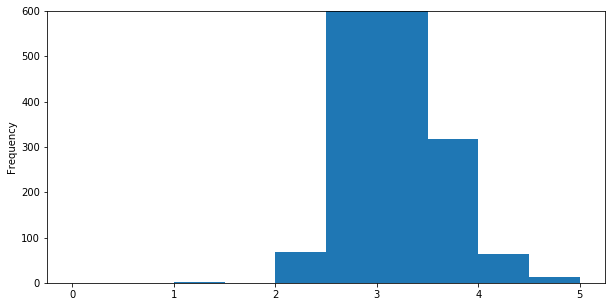

In [39]:
data['ceiling_height'].plot(kind = 'hist',bins=10, range = (0, 5), ylim = (0, 600), figsize = (10,5))
plt.show()

Минимальная высота потолка в жилом помещении 2,5 мм, в наших данных встречаются значения меньше.

In [40]:
unusual_small_height = data.query('ceiling_height <2.5')
print(len(unusual_small_height), round(len(unusual_small_height)*100/len(data),2),'%')

71 0.31 %


Очевидно это ошибки в заполнении даных, но доля таких значений мала, ими можно пренебречь. Теперь посмотрим значения больше 4 метров.

In [41]:
unusual_big_height = data.query('ceiling_height > 4')
unusual_big_height['ceiling_height'].value_counts()

4.20      10
27.00      8
4.50       7
25.00      7
4.10       3
4.40       3
8.00       3
4.70       2
5.30       2
4.19       2
32.00      2
4.45       2
4.25       1
20.00      1
26.00      1
27.50      1
14.00      1
6.00       1
5.50       1
4.37       1
4.65       1
22.60      1
24.00      1
100.00     1
5.00       1
4.90       1
5.20       1
4.30       1
5.80       1
4.80       1
4.06       1
8.30       1
5.60       1
4.15       1
10.30      1
4.14       1
Name: ceiling_height, dtype: int64

Вероятно в некоторых значениях 26.0, 27.50 и др. неправильно поставлен знак.

In [42]:
def fix_ceiling (row):
    if row['ceiling_height'] >=25:
        return row['ceiling_height']/10
    else:
        return row['ceiling_height']
data['ceiling_height'] =  data.apply(fix_ceiling , axis=1)
data['ceiling_height'].head()

0    2.70
1    2.65
2    3.03
3    2.65
4    3.05
Name: ceiling_height, dtype: float64

In [43]:
data['ceiling_height'].isin(['27.00', '25.00', '32.00', '26.00', '27.50']).sum()

0

Создадим датасет с отфильтрованными данными по высоте потолка. 

In [44]:
data_ceiling_filtered = data.query('ceiling_height >= 2.5 and ceiling_height <= 4.0')
# проверим на произвольных значениях
data_ceiling_filtered['ceiling_height'].isin([1.00, 4.70]).sum()

0

In [45]:
data_ceiling_filtered['ceiling_height'].median()

2.65

#### **Площадь**

In [46]:
data['total_area'].describe()

count    23026.000000
mean        60.677171
std         35.982411
min         12.000000
25%         40.300000
50%         52.800000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Отмечается большой размах значений, причем максимальное значение выглядит как "вброс" и утягивает среднее от медианы в сторону больших значений.

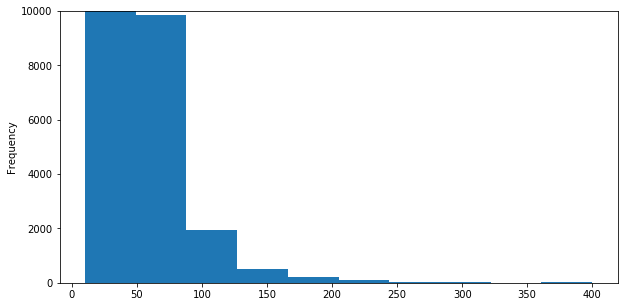

In [47]:
data['total_area'].plot(kind = 'hist',bins=10, range = (10, 400), ylim = (0, 10000), figsize = (10,5))
plt.show()

В целом распределение походит на усеченное нормальное распределение с усечением нижнего хвоста.

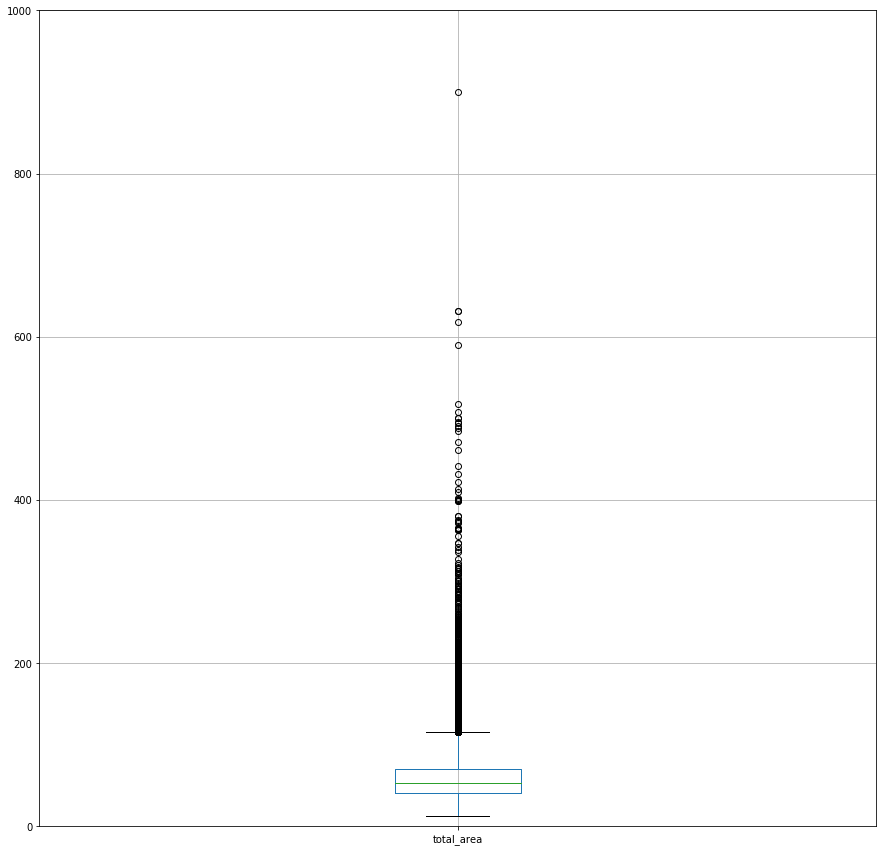

In [48]:
databox = data.boxplot('total_area', figsize = (15,15))
plt.ylim(0,1000), databox
plt.show()

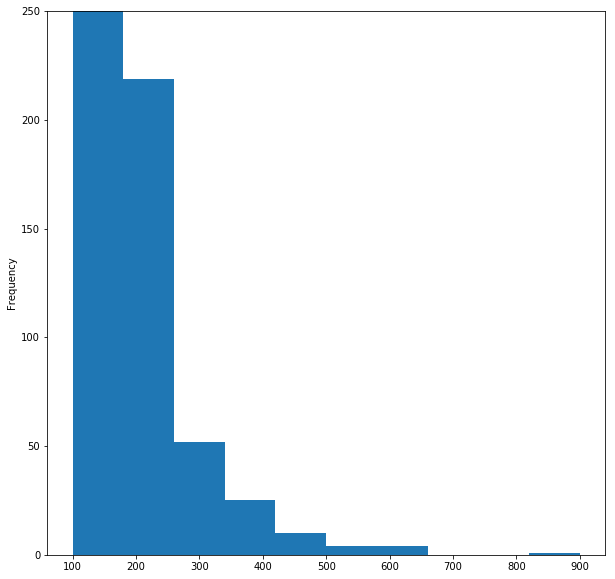

In [49]:
# рассмотрим подробнее "большие" значения
data['total_area'].plot(kind = 'hist',bins=10, range = (100, 900), ylim = (0, 250),figsize = (10,10))
plt.show()

На датабоксе тоже видно как далеко отстоит максимальное значение от "больших" значений выборки, крайние значения больше 400 - единичные, но искажают данные. Примем за границу чрезмерно больших значений больше 320.

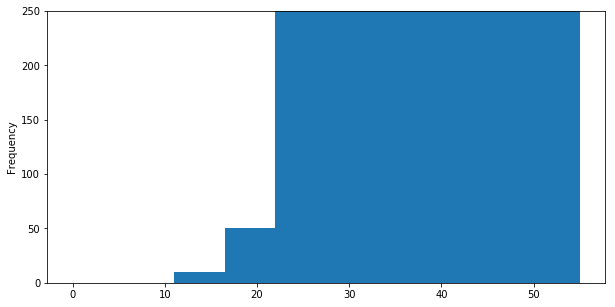

In [50]:
# рассмотрим подробнее "маленькие" значения
data['total_area'].plot(kind = 'hist',bins=10, range = (0, 55), ylim = (0, 250), figsize = (10,5))
plt.show()

In [51]:
# посмотрим количество и долю слишком больших значений
unusual_big_area = data.query('total_area >= 320')
print(len(unusual_big_area), round(len(unusual_big_area)*100/len(data),2),'%')
# посмотрим количество и долю подозрительно низких значений
unusual_small_area = data.query('total_area <= 18')
print(len(unusual_big_area), round(len(unusual_big_area)*100/len(data),2),'%')
print()
#пересчитаем меры распределения для выборки без выбивающихся значений
data_area_filtered = data.query('total_area >18 and total_area < 320')
mean = round(data_area_filtered['total_area'].mean(),2)
median = data_area_filtered['total_area'].median()
f'Среднее: {mean}, Медиана: {median}'

49 0.21 %
49 0.21 %



'Среднее: 59.92, Медиана: 52.7'

Можно отбросить крайние значения ввиду их небольшой доли без изменения медианы выборки, но при этом уменьшается "перекос" среднего в сторону больших значений.

#### **Число комнат**


In [52]:
data['rooms'].describe()

count    23026.00000
mean         2.08460
std          1.08351
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max         19.00000
Name: rooms, dtype: float64

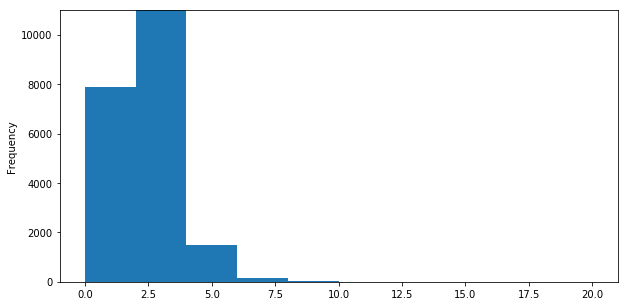

In [53]:
data['rooms'].plot(kind = 'hist',bins=10, range = (0, 20), ylim = (0, 11000),figsize = (10,5))
plt.show()

Среднее и медиана близки, то есть "крайние" значения значимо не искажают выборку, несмотря на большой максимум в 19 комнат. Минимальное значение 0 - объясняется наличием квартир студий.

In [54]:
# количество и доля квартир с 0 комнат
no_rooms = data.query('rooms == 0')
print(len(no_rooms), round(len(no_rooms)*100/len(data),2),'%')
# количество и доля студий
studio = data.query('studio == True')
print(len(studio), round(len(studio)*100/len(data),2),'%')

194 0.84 %
146 0.63 %


В целом данные сопоставимы, возможно в некоторых строках было пропущено указание, что квартира-студия.

Граница 75% перцентиля 3, на гистограмме также видно резкое "падение" частоты встречаемости квартир с о количеством комнат больше трех.

In [55]:
# количество и доля квартир с более 5 комнат
print(len(data.query('rooms >5')), round(len(data.query('rooms >5'))*100/len(data),2),'%')

194 0.84 %


In [56]:
data_rooms_filtered = data.query('rooms <= 5')
mean = round(data_rooms_filtered['rooms'].mean(),2)
median = data_rooms_filtered['rooms'].median()
f'Среднее: {mean}, Медиана: {median}'

'Среднее: 2.04, Медиана: 2.0'

Можно убрать крайние значения, без нарушения распределения.

#### **Цена**

In [57]:
data['last_price'].describe().apply(lambda x: '%.0f' % x)

count        23026
mean       6592928
std       11029673
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: object

Минимальное и максимальное значени "нереальные", похожи на вбросы.

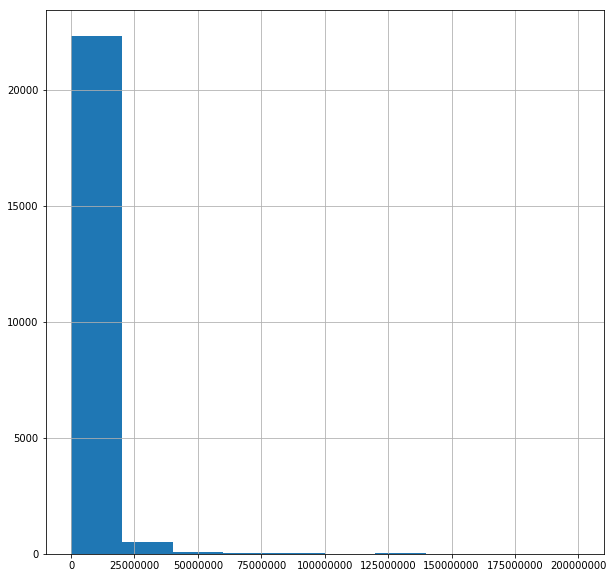

In [58]:
data['last_price'].hist(figsize = (10,10), range = (0, 200000000))
plt.ticklabel_format(style = 'plain')

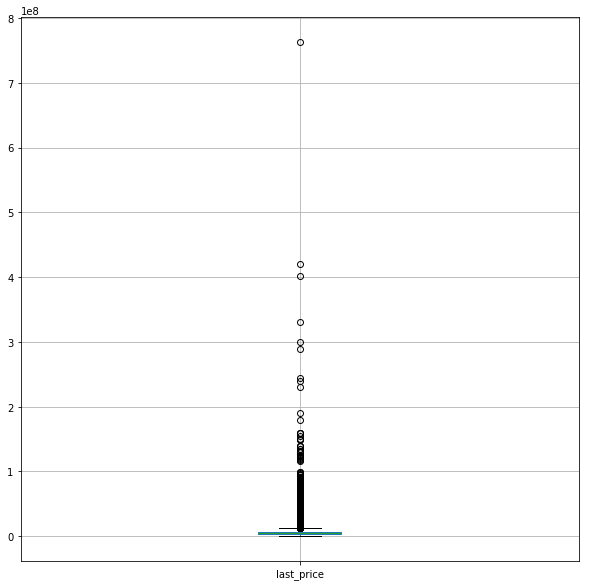

In [59]:
databox = data.boxplot('last_price', figsize = (10,10))

Похоже на нормальное распределение с усечением нижнего хвоста и с длинным хвостом в сторону больших величин. Большие значения перетягиваю среднее в свою сторону от медианы.

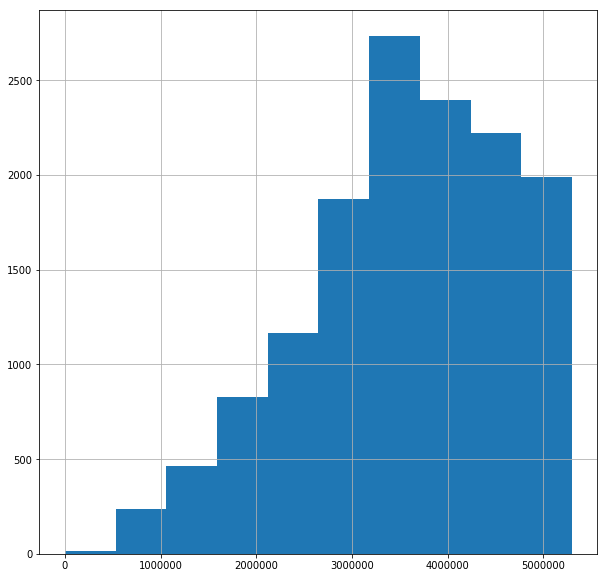

In [60]:
# рассмотрим подробнее "маленькие" значения
data['last_price'].hist(figsize = (10,10), range = (0, 5300000))
plt.ticklabel_format(style = 'plain')

Примем за границу маленьких значений 2500000, согласно графику.

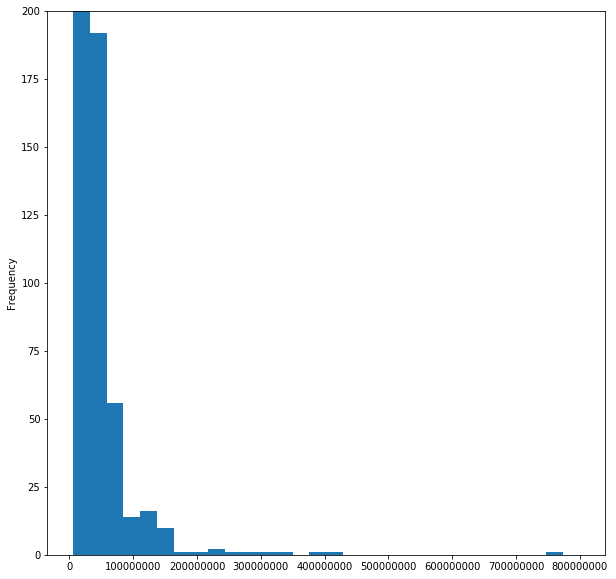

In [61]:
# рассмотрим подробнее "большие" значения
data['last_price'].plot(kind = 'hist', bins = 30, figsize = (10,10), range = (5300000,800000000), ylim = (0,200))
plt.ticklabel_format(style = 'plain')

Примем за границу ,больших значений 3000000, согласно графику.

In [62]:
# посмотрим количество и долю подозрительно низких значений
unusual_small_price = data.query('last_price <= 2500000')
print(len(unusual_small_price), round(len(unusual_small_price)*100/len(data),2),'%')
# посмотрим количество и долю слишком больших значений
unusual_big_price = data.query('last_price >= 3000000')
print(len(unusual_big_price), round(len(unusual_big_price)*100/len(data),2),'%')
print()
data_price_filtered = data.query('last_price >= 2500000 and last_price <= 30000000')

mean = round(data_price_filtered['last_price'].mean(),2)
median = data_price_filtered['last_price'].median()
f'Среднее: {mean}, Медиана: {median}'

2400 10.42 %
19154 83.18 %



'Среднее: 6216318.04, Медиана: 4900000.0'

Можно отсечь "крайниие" большие без значимого искажения распределения.

In [63]:
# создадим датафрейм с отфильтрованными значениями в столбцах высота потолка, цена, комнаты и площадь
data_filtered = data.query('ceiling_height >= 2.5 and ceiling_height <= 4.0'
                           and 'total_area >18 and total_area < 320'
                           and 'last_price >= 2500000 and last_price <= 30000000'
                           and 'rooms <= 5')
print(data_filtered[['ceiling_height','total_area','last_price','rooms']].head(10))

   ceiling_height  total_area  last_price  rooms
0            2.70       108.0    13000000      3
1            2.65       159.0    64900000      3
2            3.03       100.0    10000000      2
3            2.65        71.6     7915000      2
4            3.05        82.0     6700000      3
5            2.75       121.0    14200000      3
6            2.65        97.2     6500000      2
7            2.75        76.0     6800000      2
8            2.60        70.0     7100000      3
9            2.65       100.0     8600000      3


### 2.  Изучение времени продажи квартиры

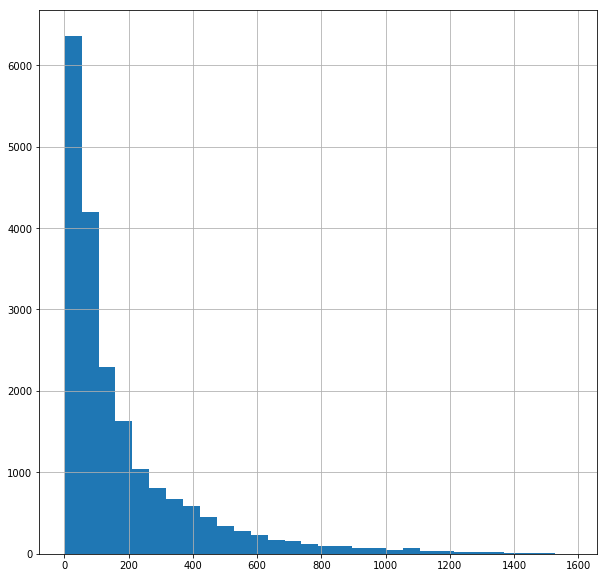

In [64]:
data['days_exposition'].hist(bins = 30, figsize = (10,10))
plt.show()

In [65]:
mean =  round(data['days_exposition'].mean(), 2)
median =  data['days_exposition'].median()
f'Среднее: {mean}, Медиана: {median}'

'Среднее: 181.49, Медиана: 96.0'

Медиана практически в 2 раза меньше среднего, распределение смещено вправо (удлиненный правый "хвост").

In [66]:
data['days_exposition'].describe()

count    19925.000000
mean       181.487277
std        220.261107
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Для большинства значений выборки справедливо: обычно продажа занимает от 45 до 240 дней. 

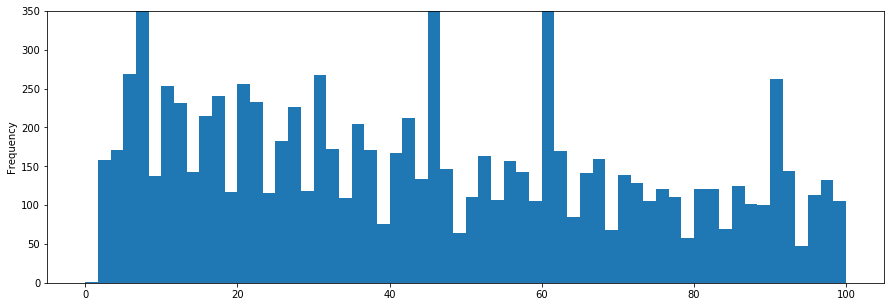

In [67]:
#рассмотрим подробнее часть гистограммы с "быстрыми" продажами
data['days_exposition'].plot(kind = 'hist',bins=60, range = (0, 100), ylim = (0, 350), figsize = (15,5))

В данных довольно много быстрых продаж, нет четкой границы. Можно считать, что продажа прошла очень быстро, если она заняла менее 10 дней, примерный уровень ближайшего к минимальной границе всплеска продаж. 

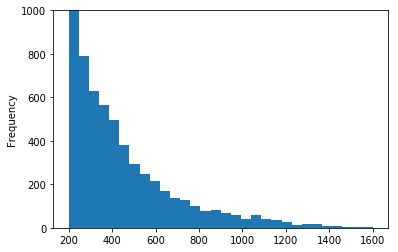

In [68]:
#рассмотрим подробнее часть гистограммы с "долгими" продажами
data['days_exposition'].plot(kind = 'hist',bins=30, range = (200, 1600), ylim = (0, 1000))
plt.show()

Согласно гистограмме, можно сказать, что продажа длится слишком долго, когда она превышает 600 дней.

In [69]:
mean = round(data.query('days_exposition>10 & days_exposition <600')['days_exposition'].mean(), 2)
median = data.query('days_exposition>10 & days_exposition <600')['days_exposition'].median()
f'Среднее: {mean}, Медиана: {median}'

'Среднее: 148.67, Медиана: 97.0'

При отбрасывании "аномальных значений" медиана выборки не меняется, а среднее несколько приближается к медиане, что делает распределение более "нормальным" и косвенно подтверждает правильность выбора границ "аномальных" значений.

### 3. Какие факторы больше всего влияют на стоимость квартиры? 

**Площадь**

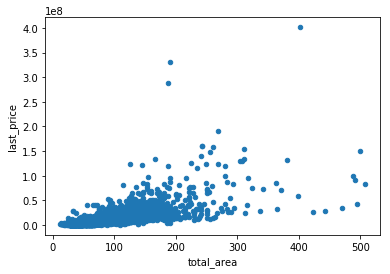

In [70]:
# посторим диаграмму рассеяния для цены и площади из датафрейма с отфильтрованными значениями площади
data_filtered.plot(x='total_area', y='last_price', kind='scatter')
plt.show()

Точки расположены преимущественно вдоль одной линии, визуально кажется есть небольшая положительная корреляция. Проверим коэффициент Пирсона.

In [71]:
round(data_filtered['total_area'].corr(data['last_price']), 2)

0.68

Согласно коэффициенту Пирсона есть положительная корреляция между площадью и ценой квартиры.

**Число комнат**

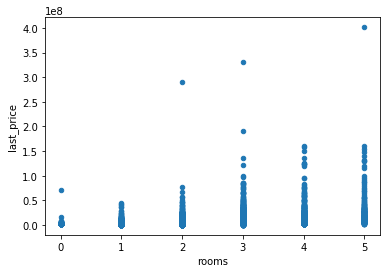

In [72]:
# посторим диаграмму рассеяния для цены и количества комнат из датафрейма с отфильтрованными значениями комнат
data_filtered.plot(x='rooms', y='last_price', kind='scatter')
plt.show()

Визуально по диаграмме прослеживается положительная корреляционная связь при увеличении количества комнат от студии до 3, на участке от 3 до 5 комнат, корреляция менее выражена.

In [73]:
round(data_filtered['rooms'].corr(data['last_price']), 2)

0.35

Коэффициент Пирсона показывает наличие слабой корреляционной связи, так как связь носит нелинейный характер.

**Удаленность от центра**

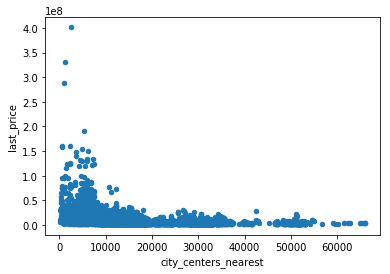

In [74]:
# посторим диаграмму рассеяния для цены и удаленности от центра
data_filtered.plot(x='city_centers_nearest', y='last_price', kind='scatter')
plt.show()

Визуально по диаграмме можно предположить наличие слабой отрицательной корреляционной связи, проверим по коэффициенту Пирсона.

In [75]:
round(data['city_centers_nearest'].corr(data['last_price']), 2)

-0.21

Коэффициент подтверждает наши предположения об отрицательном характере связи, сделанные на основе графика, также показывая, что связь очень слаба, практически отсутствует.

**Этаж**

Приведем категории по этажу к числовому обозначению.

In [76]:
def categorize_floor_num(row):
        if row ['floor_category'] == 'первый':
            return 1
        if row ['floor_category'] == 'последний':
            return 2
        else:
            return 0
#добавим новый столбец с числовой категорией по этажу
data_filtered['floor_category_num'] =  data.apply(categorize_floor_num, axis=1)
data_filtered[['floor_category','floor_category_num']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,floor_category,floor_category_num
0,другой,0
1,другой,0
2,другой,0
3,другой,0
4,первый,1


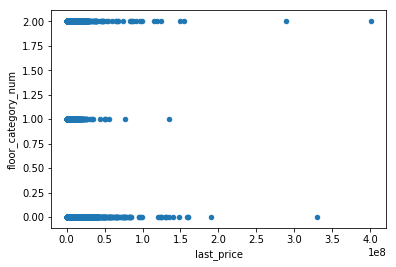

In [77]:
# посторим диаграмму рассеяния для цены и этажа
data_filtered.plot(x='last_price', y='floor_category_num', kind='scatter')
plt.show()

Визуально по диаграмме видно, что квартиры на первом этаже дешевле, корреляция имеет нелинейный характер, поэтому не может быть оценена с помощью коэффициента Пирсона.

**Дата публикации**

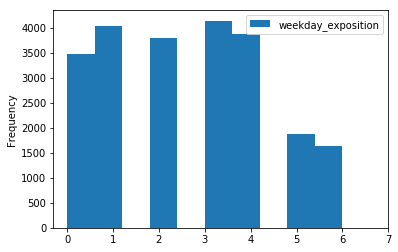

In [78]:
# построим графики для цены в зависимости:
# от дня недели
data_filtered.plot(kind = 'hist',  xticks = range (0,8,1), x='last_price', y='weekday_exposition')
plt.show() 

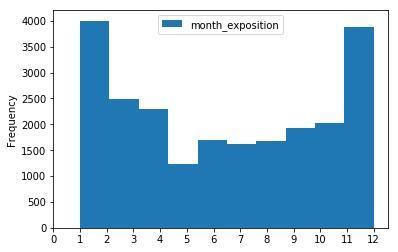

In [79]:
# месяца
data_filtered.plot(kind = 'hist',  xticks = range (0,13,1), x='last_price', y='month_exposition')
plt.show()

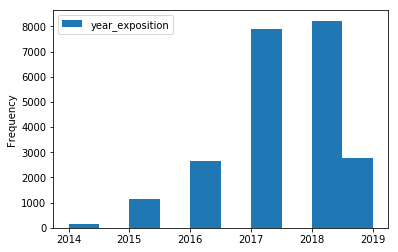

In [80]:
# года
data_filtered.plot(x='last_price', y='year_exposition', kind = 'hist')
plt.show()

По гистограммам видно, что в датафрейме обявлений о продаже опубликовано больше в будние дни, с декабря по март, 2017 и 2018 годах. 

#### Вывод

Наибольшее влияние на стоимость квартир оказывает площадь квартиры, менее выраженное влияние количетсва комнат, также отмечается, что квартиры на первом этаже дешевле. Ожидаемое влияние удаленности от центра на стоимость в виде её понижения, характер влияния по знаку подтвержден, но по выраженности незначим.

### 4. Населенные пункты

In [81]:
# выберем населенные пункты с наибольшим количеством объявлений
print(data_filtered['locality_name'].value_counts(ascending = False).head(10))
# сохраним названия населенных пунктов в отдельный список
top_10 = data_filtered['locality_name'].value_counts(ascending = False).head(10).index
top_10

Санкт-Петербург    15114
 Мурино              538
 Шушары              429
Всеволожск           388
Пушкин               362
Колпино              329
 Парголово           309
Гатчина              301
 Кудрово             295
Выборг               232
Name: locality_name, dtype: int64


Index(['Санкт-Петербург', ' Мурино', ' Шушары', 'Всеволожск', 'Пушкин',
       'Колпино', ' Парголово', 'Гатчина', ' Кудрово', 'Выборг'],
      dtype='object')

In [82]:
data_top_10 = data_filtered.query('locality_name in @top_10')
top_10_price = data_top_10.pivot_table(index = ['locality_name'], values = 'metr_price', aggfunc = ['mean'])
top_10_price.columns = ['mean_metr_price']
top_10_price = top_10_price.sort_values(by = ['mean_metr_price'], ascending = False)
top_10_price.style.format({'mean_metr_price': '{:0.0f}'}) 

,mean_metr_price
locality_name,
Санкт-Петербург,114518
Пушкин,103343
Кудрово,92494
Парголово,90081
Мурино,85616
Шушары,78414
Колпино,75383
Гатчина,68757
Всеволожск,68704


Среди 10 населенных пунктов с наибольшим количеством объявлений: населенный пункт с самой высокой ценой за квадратный метр - Санкт-Петербург, а с самой низкой ценой за квадратный метр - Выборг.

### Центральная область 

In [83]:
# выделим объявления из Санкт-Петербурга в отдельный датафрейм
data_spb = data_filtered.query('locality_name == "Санкт-Петербург"')
# переведем расстояние до центра в километры
data_spb['city_centers_km'] = (round(data_spb['city_centers_nearest']/1000)).astype('int')
data_spb[['city_centers_nearest','city_centers_km']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,city_centers_nearest,city_centers_km
0,16028.0,16
1,6800.0,7
2,8098.0,8
3,11634.0,12
4,10698.0,11


In [84]:
data_spb['median_km_price'] = data_spb.groupby('city_centers_km')['last_price'].transform(lambda x : x.median())
data_spb[['city_centers_nearest','city_centers_km','median_km_price']].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,city_centers_nearest,city_centers_km,median_km_price
0,16028.0,16,4750000.0
1,6800.0,7,7801500.0
2,8098.0,8,7400000.0
3,11634.0,12,5000000.0
4,10698.0,11,5000000.0
5,12843.0,13,5250000.0
6,2336.0,2,9800000.0
7,14640.0,15,4934000.0
8,11456.0,11,5000000.0
9,11526.0,12,5000000.0


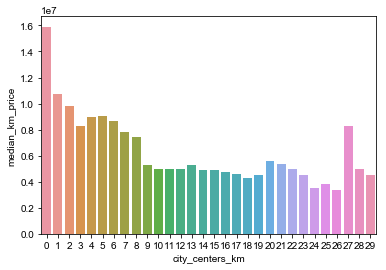

In [85]:
# построим столбчатую диаграмму для отображения среденй цены и расстояния до центра
sns.barplot(x='city_centers_km', y='median_km_price', data = data_spb)
sns.set(rc={'figure.figsize':(20, 5)})
plt.show()

Из диаграммы видно, что центральная зона до 8 км от центра включительно.

In [86]:
# выделим центральную зону в отдельный датафрейм
data_spb_centr = data_spb.query('city_centers_km <= 8')

Медиана потолки: 2.77


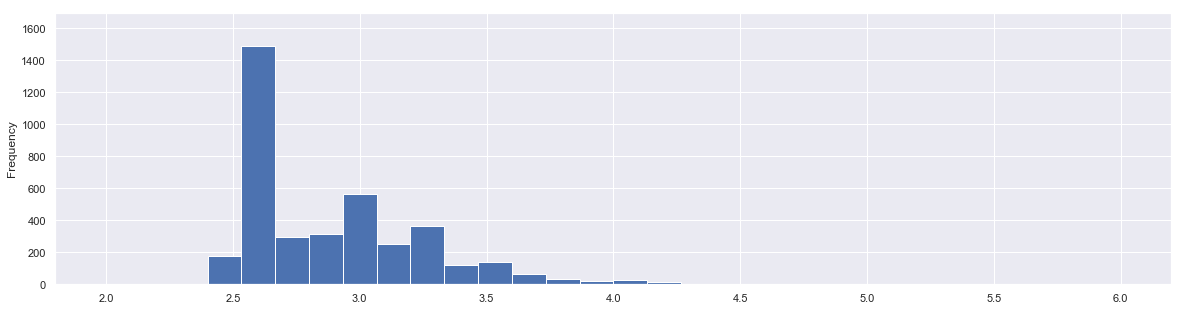

In [87]:
# высота потолков в центральной зоне
data_spb_centr['ceiling_height'].plot(kind = 'hist',bins=30, range = (2, 6), ylim = (0,1700))
print('Медиана потолки:', data_spb_centr['ceiling_height'].median())

Медиана цена: 8750000.0


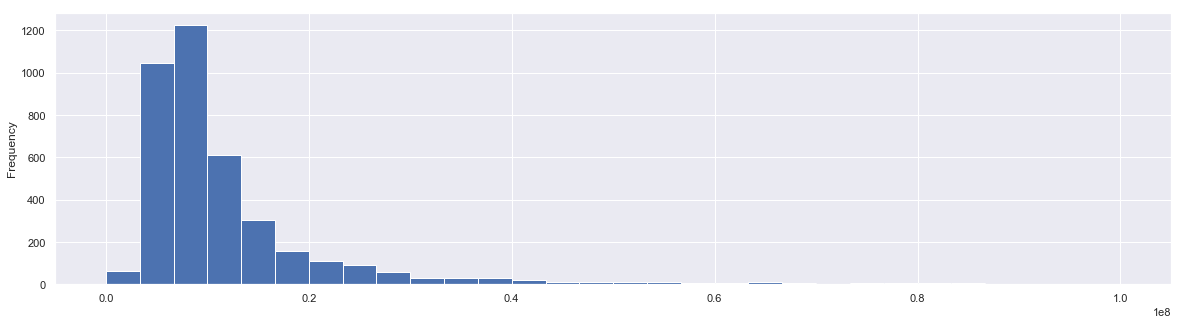

In [88]:
# цена в центральной зоне
data_spb_centr['last_price'].plot(kind = 'hist',bins=30,range = (0, 100000000))
print('Медиана цена:', data_spb_centr['last_price'].median())


Медиана комнаты: 3.0


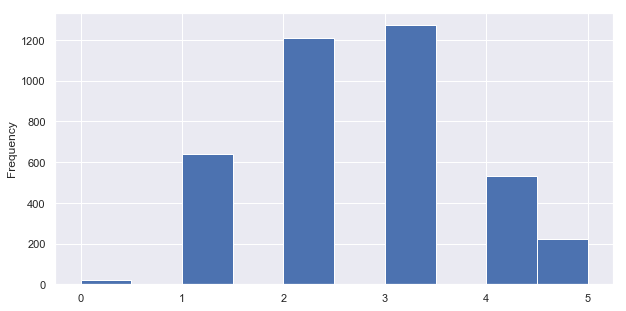

In [89]:
# комнаты в центральной зоне
data_spb_centr['rooms'].plot(kind = 'hist',bins=10, figsize = (10,5))
print('Медиана комнаты:', data_spb_centr['rooms'].median())

Распределения данных в общем датасете и в центральной зоне схожие, но в центральной зоне мединаы по всем параметрам - цена, количество комнат и высота потолков выше, чем общие.

Построим матрицы диаграмм рассеяния и корреляционные матрицы для центральной зоны и сравним с аналогичными данными всего датафрейма.

<function matplotlib.pyplot.show(*args, **kw)>

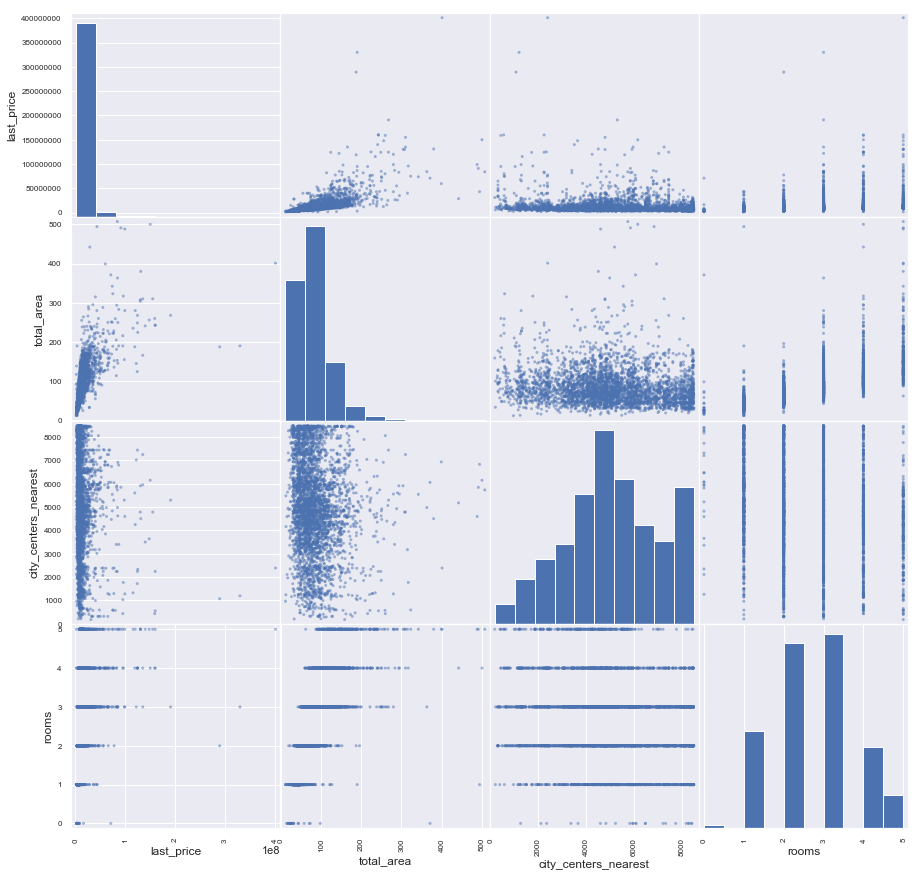

In [90]:
# площадь, удаленность от центра и количество комнат диаграммы рассеяния
pd.plotting.scatter_matrix(data_spb_centr[['last_price','total_area','city_centers_nearest','rooms']], figsize = (15,15))
plt.show

In [91]:
# площадь, удаленность от центра и количество комнат коэффициенты Пирсона
round(data_spb_centr[['last_price','total_area','city_centers_nearest','rooms']].corr(), 2)

,last_price,total_area,city_centers_nearest,rooms
last_price,1.00,0.66,-0.10,0.32
total_area,0.66,1.00,-0.14,0.69
city_centers_nearest,-0.10,-0.14,1.00,-0.21
rooms,0.32,0.69,-0.21,1.00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


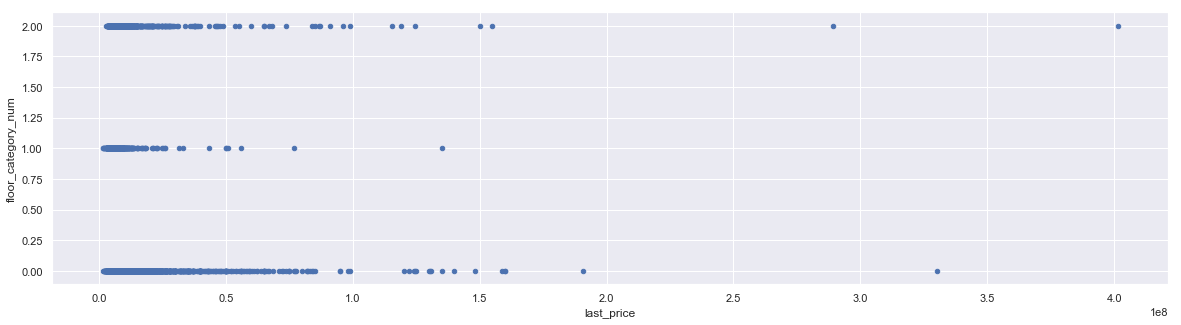

In [92]:
# этаж
data_spb_centr.plot(x='last_price', y='floor_category_num', kind='scatter')

По диаграмме рассеяния видно, что квартиры на первом этаже стоят дешевле, корреляция имеет нелинейный характер, диаграмма схожа с диаграммой для общей выборки.

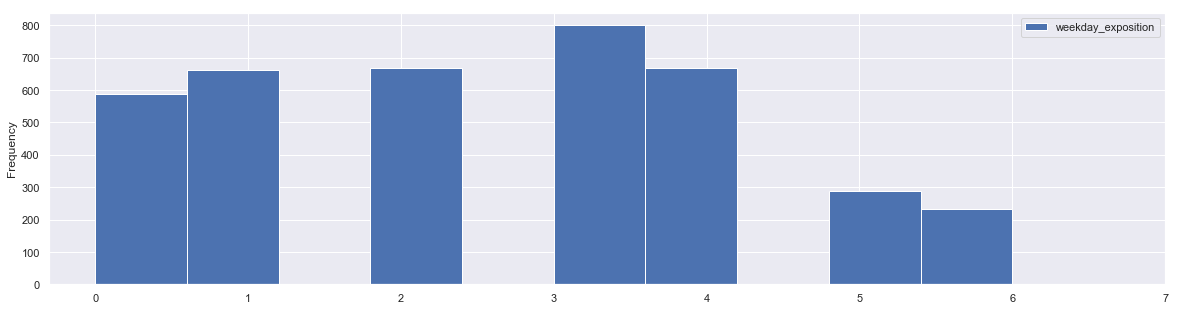

In [93]:
# день недели
data_spb_centr.plot(kind = 'hist',  xticks = range (0,8,1), x='last_price', y='weekday_exposition')
plt.show() 

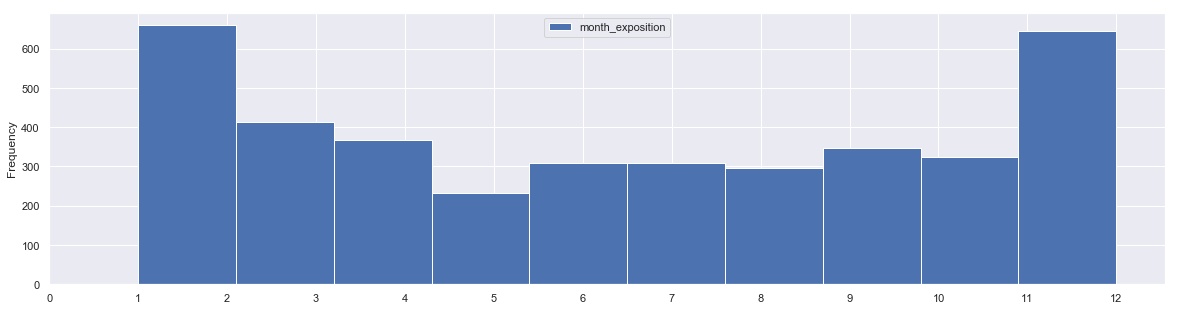

In [94]:
# месяц
data_spb_centr.plot(kind = 'hist',  xticks = range (0,13,1), x='last_price', y='month_exposition')
plt.show() 

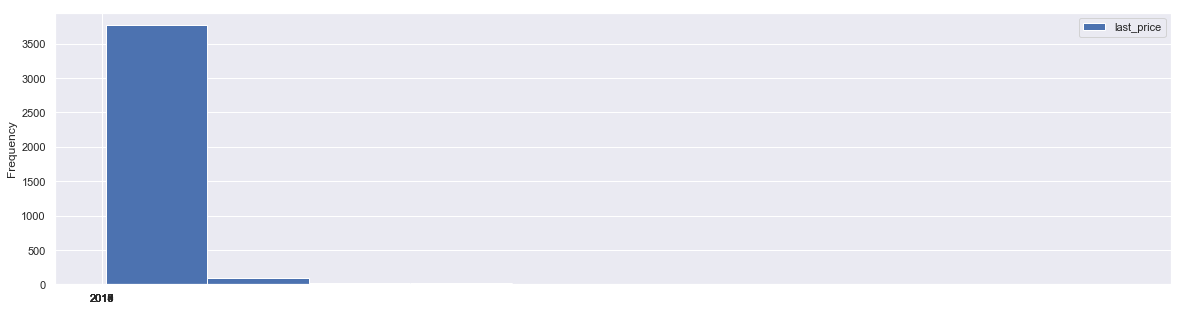

In [95]:
# год
data_spb_centr.plot(kind = 'hist', x='year_exposition', y='last_price')
plt.xticks([2014,2015,2016,2017,2018,2019])
plt.show()

По гистограммам видно, что в датафрейме обявлений о продаже опубликовано больше в будние дни, с декабря по март, 2017 и 2018 годах, что соответствует распределению в общей выборке.

### Вывод

1. Диаграммы рассеяния по всем показателям (площадь, удаленность от центра, этаж и количество комнат) для центральной зоны выглядят схоже с общими
2. Корреляционные коэффициенты сохраняют свое направление в сравнении с общими и с точностью до десятых совпадают по значению для площади и количества комнат, корреляционная связь цены и удаленности от цента в центральной области слабее.
3. Таким образом можно сказать, что выводы о влиянии на стоимость квартир в центральном сегменте не отличаются от таковых по всему городу.

## Общий вывод

1. Наибольшее влияние на стоимость квартиры оказывает её площадь, корреляция - положительная, в меньшей степени оказывает влияение количество комнат, корреляция - положительная. 
2. Удаленность от центра не оказывает значимого влияния на стоимость квартир. 
3. Квартиры на первом этаже стоят дешевле.
4. Санкт-Петербург является населенным пунктом с наибольшей стоимостью квадратного метра. 
5. Распределения данных в общем датасете и в центральной зоне схожие, но в центральной зоне мединаы по всем параметрам - цена, количество комнат и высота потолков выше, чем общие.
6. Выводы по влиянию на стоимость квартир справедливы и для квартир центральной зоны (до 8 км от центра включительно).